# Optimización de hiperparámetros

En esta clase vamos a trabajar con un dataset que contiene características y precios de autos.

Primero que nada, importamos las librerías más comunes que siempre utilizamos:

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

La siguiente celda descarga el csv a su entorno de colab para luego importarlo con padas. Si quieren guardarse el csv, les dejo el link:

Link de descarga csv: https://drive.google.com/file/d/1gjwldBldRwzy26E8HCCBPXPVSBZOkynz/view?usp=sharing

In [58]:
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gjwldBldRwzy26E8HCCBPXPVSBZOkynz' -O car_prices.csv

In [59]:
df = pd.read_csv('car-prices.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [60]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


# EDA

¿Cuántas filas tiene el dataset?

In [61]:
df.shape

(4345, 9)

### Nulos

¿Hay nulos?

In [62]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

Eliminar las filas que tienen nulos

In [63]:
df.dropna(axis=0, inplace=True)

Validar que no hayan quedado nulos

In [64]:
df.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

### Registration

¿Cuántos valores distintos toma "Registration"?

In [65]:
df["Registration"].nunique()

2

¿Con que frecuencia aparece cada uno?

In [66]:
df["Registration"].value_counts()

yes    3654
no      371
Name: Registration, dtype: int64

Graficar

C:\Users\Tmk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Registration', ylabel='count'>

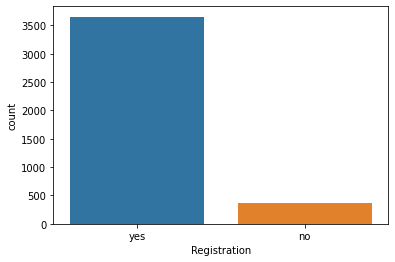

In [67]:
sns.countplot(df["Registration"])

¿Y en porcentajes?

In [68]:
df["Registration"].value_counts(normalize=True)

yes    0.907826
no     0.092174
Name: Registration, dtype: float64

### Price

Price es nuestro target. ¿Còmo se distibuye?

<AxesSubplot:xlabel='Price', ylabel='Count'>

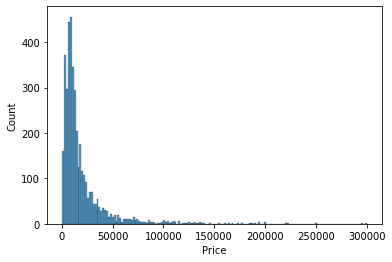

In [69]:
sns.histplot(df["Price"])

¿Tiene outliers? Graficar

C:\Users\Tmk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

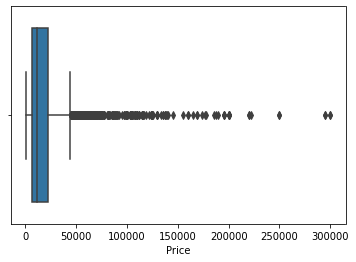

In [70]:
sns.boxplot(df["Price"])

### Mileage

¿Cómo se distribuye?

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

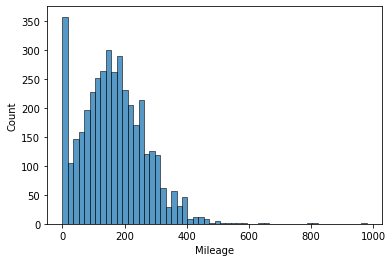

In [71]:
sns.histplot(df["Mileage"])

¿Hay outliers? Graficar

C:\Users\Tmk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

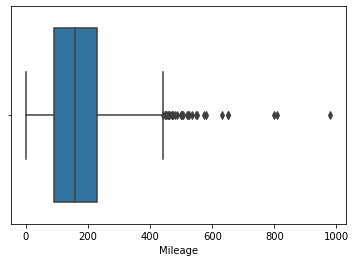

In [72]:
sns.boxplot(df["Mileage"])

### Body

¿Cuántos valores distintos puede tomar esta feature?

In [73]:
df["Body"].nunique()

6

¿Qué valores puede tomar?

In [74]:
df["Body"].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

¿Con que frecuencia toma cada valor? 


In [75]:
df["Body"].value_counts(normalize=True)

sedan        0.381118
crossover    0.204720
van          0.155528
other        0.097888
vagon        0.094161
hatch        0.066584
Name: Body, dtype: float64

### Year

¿En que rango de años tenemos datos?

In [76]:
df["Year"].min()

1969

In [77]:
df["Year"].max()

2016

¿Hay alguna relación entre el año y el precio? 

Graficar scatterplot

<AxesSubplot:xlabel='Year', ylabel='Price'>

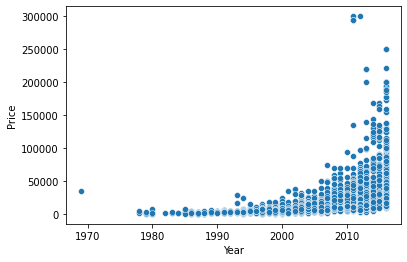

In [78]:
sns.scatterplot(data= df, x= "Year", y="Price")

Graficar lineplot

<AxesSubplot:xlabel='Year', ylabel='Price'>

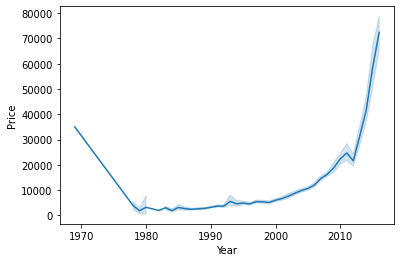

In [79]:
sns.lineplot(data = df, x= "Year", y="Price")

¿Qué paso en el año 1970?

Imprimir las filas donde el año es menor a 1980

In [80]:
df[df["Year"]<1980]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
288,Toyota,600.0,sedan,10,1.5,Petrol,yes,1979,Corolla
810,Mercedes-Benz,34999.0,sedan,150,2.8,Petrol,yes,1969,S 280
1025,Mercedes-Benz,2300.0,sedan,261,2.3,Gas,yes,1978,E-Class
1896,Mercedes-Benz,1950.0,sedan,1,2.0,Diesel,yes,1979,200
2122,Mercedes-Benz,2990.0,sedan,300,2.8,Gas,yes,1979,S 280
4319,Mercedes-Benz,5500.0,sedan,440,2.0,Petrol,yes,1978,E-Class


¿Hay alguna relación importante entre Year y Mileage? Graficar

<AxesSubplot:xlabel='Year', ylabel='Mileage'>

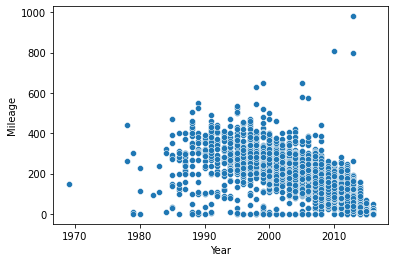

In [81]:
sns.scatterplot(data = df, x="Year", y="Mileage")

<AxesSubplot:xlabel='Year', ylabel='Mileage'>

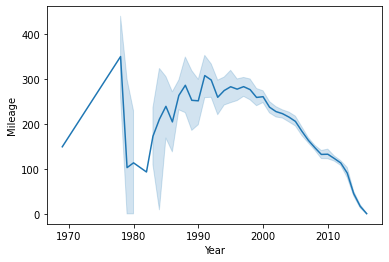

In [82]:
sns.lineplot(data = df, x="Year", y="Mileage")

### Model

¿Cuántos modelos distintos hay?

In [83]:
df["Model"].nunique()

306

¿Cuál es el que aparece más veces?

In [84]:
df["Model"].mode()

0    E-Class
dtype: object

In [85]:
# 5 valores más repetidos
df["Model"].value_counts()[0:5,]

E-Class    188
A6         156
Vito       156
Kangoo     136
Camry      127
Name: Model, dtype: int64

# Preprocesamiento

Vamos a descartar la variable Model por simplicidad

Descartar la columna model:

In [86]:
df.drop(columns="Model", inplace=True)

Vamos a hacer el preprocesamiento utilizando pipelines.

Para esto, primero que nada definimos una clase que nos permitirá seleccionar algunas features de nuestro dataset.

In [87]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.base import BaseEstimator, TransformerMixin

In [88]:
class SelectColumns(BaseEstimator, TransformerMixin):
    def __init__(self, names=None):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]

Ahora, definiremos un pipeline que trata por un lado a variables categóricas y por el otro lado a variables numéricas.

Al final de todo, entrena un modelo decision tree regressor:

In [89]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

Para esto, primero que nada necesitamos definir 2 listas:
- una que contenga el nombre de las features categóricas
- Otra que contenga el nombre de las features numéricas

Definir las listas cat_cols y num_cols:

In [90]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [91]:
cat_cols = ["Brand", "Body", "Engine Type", "Registration"]
num_cols = ["Mileage", "EngineV", "Year"]

Ahora, definimos nuestro pipeline:

In [127]:
pipe = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(SelectColumns(names=num_cols), StandardScaler())),
        ('categorical', make_pipeline(SelectColumns(names=cat_cols), OneHotEncoder(sparse=False)))
    ])),
    ('model', DecisionTreeRegressor(random_state=0))
])

Separar el dataset en X e y:

In [128]:
X=df.drop(columns="Price")
y=df["Price"]

Separar los datos con un train test split. Para obtener todos los mismos resultados, usemos un random_state = 0 y un test_size=0.15

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

Ahora, entrenar el modelo y medir su performance sobre el set de evaluación. Recuerden que el pipeline que definimos anteriormente, ya hace el preprocesamiento necesario sobre los datos.

In [131]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=['Mileage',
                                                                                       'EngineV',
                                                                                       'Year'])),
                                                                 ('standardscaler',
                                                                  StandardScaler())])),
                                                ('categorical',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=['Brand',
                                                                                       'Body',
                        

In [132]:
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

Medimos el MAE (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

In [133]:
from sklearn.metrics import mean_absolute_error

In [134]:
mean_absolute_error(y_train, pipe.predict(X_train))

229.7933615901783

In [135]:
mean_absolute_error(y_test, pipe.predict(X_test))

4386.140868285504

Utilizando el método .score de el DecisionTreeRegressor (que por defecto calcula el R cuadrado) medir el R cuadrado en train y test:

In [136]:
pipe.score(X_train, y_train)

0.9933573254536819

In [137]:
pipe.score(X_test, y_test)

0.6974733185712596

Qué conclusiones sacan de estos resultados?

Para mejorar el modelo, vamos a hacer una búsqueda exhaustiva de hiperparámetros utilizando grid search.

Importar GridSearchCV de sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [138]:
from sklearn.model_selection import GridSearchCV

Si vemos en la documentación, primero que nada debemos generar un listado de parámetros.

Vamos a definir nuesto listado de la siguiente manera:
- max_depth: 2,3,4,5,6
- min_samples_split: 1, 2, 3, 4, 5, 6
- min_samples_leaf: 1,2,3,4

Definir el diccionario de parámetros:

In [139]:
par_dict = {
    "max_depth": [2,3,4,5,6],
    "min_samples_split": [1,2,3,4,5,6],
    "min_samples_leaf": [1,2,3,4]
    }

Ahora,  como en la documentación de sklearn, definir un GridSearchCV y utilizarlo para nuestro pipeline con los parámetros que definimos anteriormente:

In [140]:
clf = GridSearchCV(pipe, par_dict)

In [141]:
clf.fit(X_train, y_train)

ValueError: Invalid parameter max_depth for estimator Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=['Mileage',
                                                                                       'EngineV',
                                                                                       'Year'])),
                                                                 ('standardscaler',
                                                                  StandardScaler())])),
                                                ('categorical',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=['Brand',
                                                                                       'Body',
                                                                                       'Engine '
                                                                                       'Type',
                                                                                       'Registration'])),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(sparse=False))]))])),
                ('model', DecisionTreeRegressor(random_state=0))]). Check the list of available parameters with `estimator.get_params().keys()`.

Esto nos da error al ejecutarlo. Si vemos el mensaje de error "Check the list of available parameters with `estimator.get_params().keys()`."

¿Qué se imaginan que está pasando?

Probemos lo que sugiere el mensaje de error, checkear el listado de parámetros disponibles utilizando el método "get_params().keys()" de nuestro pipeline.

Obtener el listado de parámetros disponibles de nuestro pipeline:

In [142]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'features', 'model', 'features__n_jobs', 'features__transformer_list', 'features__transformer_weights', 'features__verbose', 'features__numeric', 'features__categorical', 'features__numeric__memory', 'features__numeric__steps', 'features__numeric__verbose', 'features__numeric__selectcolumns', 'features__numeric__standardscaler', 'features__numeric__selectcolumns__names', 'features__numeric__standardscaler__copy', 'features__numeric__standardscaler__with_mean', 'features__numeric__standardscaler__with_std', 'features__categorical__memory', 'features__categorical__steps', 'features__categorical__verbose', 'features__categorical__selectcolumns', 'features__categorical__onehotencoder', 'features__categorical__selectcolumns__names', 'features__categorical__onehotencoder__categories', 'features__categorical__onehotencoder__drop', 'features__categorical__onehotencoder__dtype', 'features__categorical__onehotencoder__handle_unknown', 'features__categoric

Vemos que son muchos, pero si prestamos atención, vamos a ver que hay parámetros que comienzan con "features__" y "model__", justo los nombres con los que nosotros definimos a los elementos de nuestro pipeline.

Por lo tanto, al estar definidos dentro de un pipeline de sklearn, los nombres de los hiperparámetros de nuestro decision tree van a arrancar todos con "model__" (ya que es el nombre que definimos nosotros en nuestro pipeline).

Corregir el diccionario de parámetros:

In [143]:
par_dict = {
    "model__max_depth": [2,3,4,5,6],
    "model__min_samples_split": [1,2,3,4,5,6],
    "model__min_samples_leaf": [1,2,3,4]
    }

Volver a aplicar grid search con la nueva corrección:

In [145]:
clf = GridSearchCV(pipe, par_dict)
clf.fit(X_train, y_train)

C:\Users\Tmk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tmk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tmk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Tmk\AppData\Local\Programs\Python\Python39\lib\site-packag

GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('numeric',
                                                                        Pipeline(steps=[('selectcolumns',
                                                                                         SelectColumns(names=['Mileage',
                                                                                                              'EngineV',
                                                                                                              'Year'])),
                                                                                        ('standardscaler',
                                                                                         StandardScaler())])),
                                                                       ('categorical',
                                                                        Pipeline(steps=[('s

Una vez que hicimos fit sobre nuestro estimador con GridSearchCV, podemos acceder a el atributo .best_params_ que nos dice cuáles son los parámetros que mejores resultados dieron:

In [149]:
clf.best_params_

{'model__max_depth': 6,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 6}

Si ahora utilizamos nuestro GridSeachCV ya fitteado para hacer predicciones (.predict()), utilizará por defecto los mejores parámetros que encontró durante el entrenamiento.

Generar las predicciones para train, test y medir las mismas métricas que antes (R cuadrado y mean absolute error).

In [150]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [153]:
clf.score(X_train, y_train)

0.9014211058014376

In [154]:
clf.score(X_test, y_test)

0.8300760284636768

In [155]:
mean_absolute_error(y_train, clf.predict(X_train))

4142.330409240143

In [156]:
mean_absolute_error(y_test, clf.predict(X_test))

4935.867885379011